### Two feature app in Qiskit classifying the moons/iris dataset

### Imports

In [1]:
from helper_functions import prepare_dataset_moons, prepare_dataset_iris 
from qiskit.circuit import Parameter
from qiskit_machine_learning.neural_networks import SamplerQNN
from qiskit import QuantumCircuit
from qiskit.circuit import ParameterVector
from qiskit_algorithms.utils import algorithm_globals
from qiskit.circuit.library import RealAmplitudes, ZZFeatureMap
from qiskit_algorithms.optimizers import COBYLA, NELDER_MEAD
from qiskit.primitives import Sampler
from qiskit_machine_learning.algorithms import VQC

Parameters

In [2]:
q_depth = 4
n_iters = 100

Load datasets

In [3]:
X, y = prepare_dataset_iris()

Define Circuit

/tmp/ipykernel_33087/3739602942.py:14: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.cnot()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use QuantumCircuit.cx as direct replacement.
  qc.cnot(0, 1)


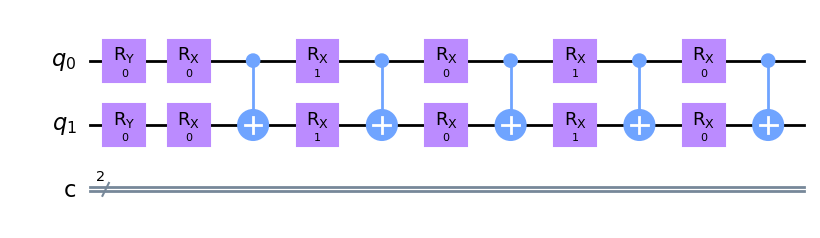

In [4]:
def circuit(features, thetas, q_depth):
    qc = QuantumCircuit(2,2)
    # encode features
    qc.ry(features[0], 0)
    qc.ry(features[1], 1)
    
    # for every layer
    for i in range(q_depth):
        # encode weights
        qc.rx(thetas[i][0], 0)
        qc.rx(thetas[i][1], 1)
        
        # CNOT between qubits
        qc.cnot(0, 1)
    return qc
    
qc1 = circuit([0,0], [[0,0],[1,1], [0,0], [1,1], [0,0]], 5)
qc1.draw("mpl", style="clifford")

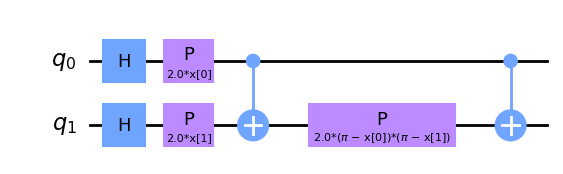

In [5]:
n_features = X.shape[1]
feature_map = ZZFeatureMap(feature_dimension=n_features, reps=1)
feature_map.decompose().draw(output="mpl", style="clifford", fold=20)
    

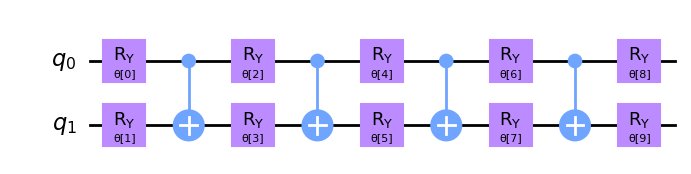

In [6]:
ansatz = RealAmplitudes(num_qubits=n_features, reps=q_depth)
ansatz.decompose().draw(output="mpl", style="clifford", fold=20)

In [7]:
optimizer = NELDER_MEAD(maxiter=n_iters)
sampler = Sampler()

In [8]:
from matplotlib import pyplot as plt
from IPython.display import clear_output

objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)


def callback_graph(weights, obj_func_eval):
    print(weights)
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

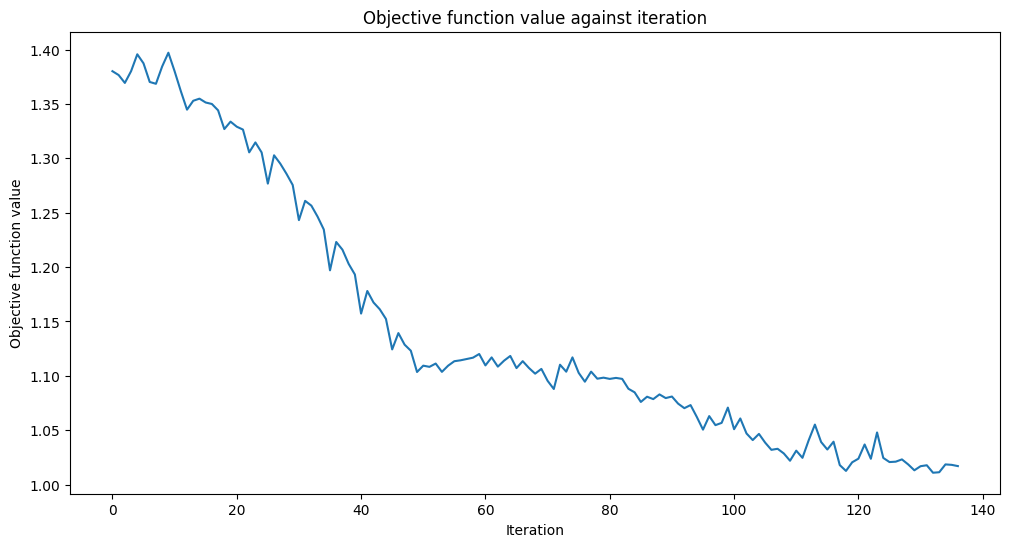

In [9]:
vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback_graph,
)

vqc.fit(X,y)